Import of general libraries

In [1]:
import numpy as np 
import pandas as pd

Veriyi okuma işlemi

In [2]:
data_true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
data_false = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [3]:
her satırın etiketlenmesi

SyntaxError: invalid syntax (<ipython-input-3-e95d5e236c12>, line 1)

her satırın etiketlenmesi

In [4]:
data_true["label"]= 0
data_false["label"]= 1

Verilere bir bakış

In [5]:
data_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
data_false.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
print(data_true.shape)
print(data_false.shape)

(21417, 5)
(23481, 5)


veriler hakkında bilgi ediniyoruz

In [8]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [9]:
data_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


Verilerin bir araya getirilmesi

In [10]:
data = pd.concat([data_true, data_false])
data.shape

(44898, 5)

In [11]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
data.head(10)

,title,text,subject,date,label
0,Rosenstein may need to recuse himself from Rus...,WASHINGTON (Reuters) - U.S. Deputy Attorney Ge...,politicsNews,"June 16, 2017",0
1,BUSTED: Trump Took Millions Of Dollars From S...,Remember when Fox host Sean Hannity directly a...,News,"October 5, 2016",1
2,Ted Cruz Gets Confronted By A Furious Trump S...,"Ever since his devastating, humiliating loss t...",News,"April 25, 2016",1
3,Bangladesh could move some Rohingya to flood-p...,DHAKA (Reuters) - Bangladesh could start reloc...,worldnews,"November 30, 2017",0
4,Germany extends passport controls on Austrian ...,BERLIN (Reuters) - Germany has extended tempor...,worldnews,"October 12, 2017",0
5,Factbox: Some Trump assertions on Iran questio...,WASHINGTON (Reuters) - In Friday’s speech layi...,politicsNews,"October 13, 2017",0
6,Trump to sign Russia sanctions bill: White House,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"July 29, 2017",0
7,Cher’s Currently On A Twitter Rampage Against...,If you ve even been on Twitter then you ll kno...,News,"August 20, 2016",1
8,Senator Asks DOJ To Step In After White Supre...,A senator from Pennsylvania is asking the Depa...,News,"November 3, 2016",1
9,Israel defence minister says hopes Palestinian...,JERUSALEM (Reuters) - Israeli Defence Minister...,worldnews,"December 10, 2017",0


In [13]:
y = data["label"]
y.shape

(44898,)

CountVectorizer'ı kopyalanan verilerle kullanma

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
copied_data = data.copy()

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(copied_data)):
    review = re.sub('[^a-zA-Z]', ' ', copied_data['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(44898, 5000)

In [19]:
y = copied_data['label']

Test Eğitimi Bölümü

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [21]:
cv.get_feature_names()[:10]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort']

In [22]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [23]:
cout_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [24]:
cout_df.head()

,abadi,abandon,abba,abc,abc news,abe,abedin,abil,abl,abort,...,zero,zika,zika fund,zimbabw,zimbabw mnangagwa,zimbabw mugab,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import matplotlib.pyplot as plt

### Function for ploting 

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Use of Multinomial NB Classifier

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
classifier = MultinomialNB()

accuracy: 0.931
Confusion matrix, without normalization


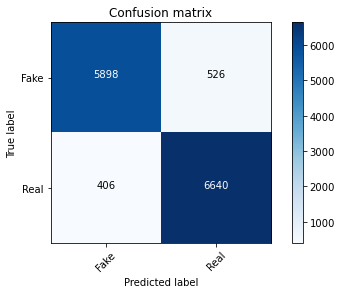

In [28]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [29]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9308092056421677

Use of Passive Aggressive Classifier

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter = 50)

accuracy: 0.932
Confusion matrix, without normalization


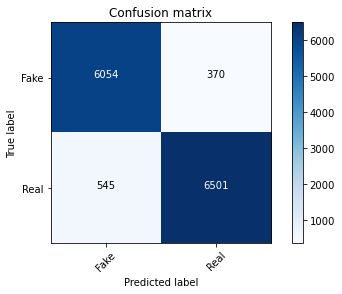

In [31]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [32]:
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9320712694877505